## Fluídos Conformes

Código para testear la estabilidad alrededor de una solución de equilibrio.

Las ecuaciones son:

$(\zeta^a, \zeta^{ab})$ -> $f^j = (\mu, v, x_i)$ -> $(-1,0,0,0,0)$

$$
\partial_t c^j = \partial_i F^{ij}(f) + I^j(f) = \frac{\partial F^{ij}}{\partial f^k}\partial_i f^k
$$

$$
c^j = C^j(f) = (e, S, c_i)
$$

Lo que hacemos es tomar el jacobiano del flujo,

$\frac{\partial F^i}{\partial f^j}$ donde $f^j$ son las variables no conservativas para las cuales tenemos las expresiones del Flujo. 
A estas las multiplicamos por $[\frac{\partial c^k}{\partial f^j}]^{-1}$.
Tenemos así 

$$
P^{il}{}_j := \frac{\partial F^{il}}{\partial c^j} = \frac{\partial F^{il}}{\partial f^k}\frac{\partial f^k}{\partial c^j}.
$$

Evaluamos todo en el vector $(-1,0,0,0,0)$ o sea estamos en el frame con velocidad cero y todas las variables fuera de equilibrio también cero.

Lo mismo hacemos con la fuente. 

$$
II^i{}_j = \frac{\partial I^i}{\partial f^k} \frac{\partial f^k}{\partial c^j}
$$

Tenemos así el sistema linearizado en el punto de equilibrio en las variables conservativas. Multiplicamos $P^i{}_j$ por un número complejo cualquiera y para todos ellos los autovalores debieran tener parte real negativa o nula. Pero no es así...


Alternativamente podemos diferenciar $c^i$ con respecto a los $f^j$ para obtener,

$$
\partial_t c^j = \frac{\partial c^j}{\partial f^i} \partial_t f^i
$$

y por lo tanto,

$$
\partial_t f^i = \frac{\partial c^j}{\partial f^i}^{-1} \frac{\partial F^{lj}}{\partial f^k}\partial_l f^k := \tilde{P}^i{}_k\partial_l f^k
$$

A las que simplemente sumamos el término $\frac{\partial c^j}{\partial f^i}^{-1}\frac{\partial I^j}{\partial f^k}$ para tener el sistema linearizado con respecto a las $f^i$.

In [73]:
using Symbolics
using LinearAlgebra
using Latexify

In [74]:
function Flux(flu,par)
    χ = par
    #flux = zeros(5)
    μ = flu[1]  
    T = (abs(μ))^(-1//2) 
    v = flu[2]
    x1 = flu[3]
    x2 = flu[4]
    x3 = flu[5]
    χ₀ = χ[1]
    χ₁ = χ[2]
    χ₂ = χ[3]
    γ = (1 - v^2)^(-1//2)
    τ = 2χ₁ * x3 * T / (γ*μ^3) + 24χ₂*(1//2*(1-v^2)x3^2 + 14//3 * x2^2 + 7/5*(1-v^2)x1*x3)/μ^5
    ρ = -6χ₀ / μ^2 - 6χ₁*x1/(γ * μ^4 * T) + 42χ₂*(6//5 *x1^2 + 10γ^2*x2^2 + 3//2*(v^2-1)^2*x3^2)/(μ^5 * γ^2)
#    Q = 10χ₀ * x2 * T / μ^3 + 168χ₂ * x2 * (x1 - (v^2 - 1)x3)/(γ * μ^5)
    Q = 10χ₁ * x2 * T / μ^3 + 168χ₂ * x2 * (x1 - (v^2 - 1)x3)/(γ * μ^5)
    #flux[1] = 4//3 * ρ*γ^2*v + γ*Q*(1+v^2)+ τ*v
    #flux[2] = 4//3 * ρ*(γ^2*v^2 + 1//4) + 2v*γ*Q + τ
    #flux[3] = χ₁*γ*v*(6*γ^2 - 1)/μ^3/T - 12χ₂*(v*(6γ^2 - 1)*x1 + (6γ^2*(2v^2 + 1)-1)*x2 + v*(v^2+2)*x3)/μ^4
    #flux[4] = χ₁*γ*(6γ^2*v^2+1)/μ^3/T - 12χ₂*((6γ^2*v+1)*x1 + v*(6γ^2*(1+v^2)+1)*x2 + (2v^2+1)*x3)/μ^4
    #flux[5] = 3χ₁*γ*v*(2γ^2*v^2+1)/μ^3/T - 12χ₂*(v*(6γ^2*v^2+3)*x1 +3*(1+6γ^2*v^2)*x2 + 3v*x3)/μ^4
    #return -flux[:]
    return [4//3 * ρ*γ^2*v + γ*Q*(1+v^2)+ τ*v; 
            4//3 * ρ*(γ^2*v^2 + 1//4) + 2v*γ*Q + τ;
            χ₁*γ*v*(6*γ^2 - 1)/μ^3/T   - 12χ₂*(v*(6γ^2 - 1)*x1   + (6γ^2*(2v^2 + 1)-1)*x2 + v*(v^2+2)*x3)/μ^4;
            #χ₁*γ*(6γ^2*v^2+1)/μ^3/T    - 12χ₂*((6γ^2*v+1)*x1     + v*(6γ^2*(1+v^2)+1)*x2  + (2v^2+1)*x3)/μ^4;
            #χ₁*γ*(6γ^2*v^2+1)/μ^3/T    - 12χ₂*((6γ^2*v^2+1)*x1     + v*(6γ^2*(1+v^2)+1)*x2  + (2v^2+1)*x3)/μ^4;
            χ₁*γ*(6γ^2*v^2+1)/μ^3/T    - 12χ₂*((6γ^2*v^2+1)*x1     + v*(6γ^2*(2+v^2)+1)*x2  + (2v^2+1)*x3)/μ^4;
            3χ₁*γ*v*(2γ^2*v^2+1)/μ^3/T - 12χ₂*(v*(6γ^2*v^2+3)*x1 + 3*(1+6γ^2*v^2)*x2      + 3v*x3)/μ^4]
end

Flux (generic function with 1 method)

Chequeamos con los valores de Marcelo. 

In [75]:
χ = [- 1.; - 2.; - 10.]
flu = [- 5.; 0.5; 2.1; 0.5; 5.1]
Flu = [5.921317694643806; 6.02302807825841; 3.713391378258412;  4.136735467078638; 3.444079555898864]

Flux(flu,χ) - Flu;

Calculamos el Jacobiano

In [76]:
@variables f[1:5], c[1:5], p[1:3]#, fl[1:5]

JFS = Symbolics.jacobian(Flux(f,p),f);
JF_exp = Symbolics.build_function(JFS, f, p);
JFac = eval(JF_exp[1]);

Definimos algunos valores para testear

In [77]:
@variables x1, x2, x3

flu=[-1.;0;0;0;0];
con=ones(5)
χ=[-1.,-0.5,-5.]

3-element Vector{Float64}:
 -1.0
 -0.5
 -5.0

El Jacobiano en equilibrio.

In [78]:
JFac(flu,p)

5×5 Matrix{Num}:
  0.0    (-8//1)*p₁          0.0    -10.0p₂      0.0
 -4.0p₁           0.0       -2.0p₂    0.0       -2.0p₂
  0.0            -5.0p₂     -0.0    -60.0p₃     -0.0
 -2.5p₂           0.0    -12p₃       -0.0    -12p₃
  0.0            -3.0p₂     -0.0    -36.0p₃     -0.0

Ahora traemos el Jacobiano de la transformación entre las variables fluido/conservativas.

In [79]:
include("inversion_ext.jl");

In [80]:
@variables χ₂ μ γ v

A = (-12 * χ₂/μ^4)*[3(2γ^2 - 1)  3v*(6γ^2 - 1)    3v^2 ;
                v*(6γ^2 - 1)  (6γ^2*(1 + 2v^2) - 1)  v*(v^2 + 2) ;
                (6γ^2 * v^2 + 1)  v*(6γ^2*(2 + v^2) - 1)  (2v^2 + 1)]

A[1,2]


-36v*χ₂*(μ^-4)*(6(γ^2) - 1)

Para posterior uso calculamos las variables conservativas correspondientes al estado de equilibrio. Esto no me lo esperaba, pensaba que me darían c1=c2=c3=0!

In [81]:
con = F(flu,zeros(5), p);

Jac(flu,con,p)

5×5 Matrix{Num}:
 -12.0p₁           0.0       -6.0p₂    0.0        0.0
   0.0    (-8//1)*p₁          0.0    -10.0p₁      0.0
  -7.5p₂          -0.0      -36.0p₃   -0.0        0.0
   0.0           -15.0p₂     -0.0    -60.0p₃     -0.0
  -7.5p₂           0.0    -12p₃       -0.0    -12p₃

In [82]:
P(flu,c,p) = Jac(flu,c,p) \ JFac(flu,p)

P (generic function with 1 method)

In [83]:
flu = [-1;0.9;0;0;0]
M0=simplify.(substitute.(P(flu,c,p), (Dict(p[2] => 0),)))

5×5 Matrix{Num}:
  0.821918   0.913242  -8.57739e-18  -8.12595e-17  -1.6297e-18
  0.024726   0.821918  -0.00100239   -0.00949633   -0.000190454
 -0.0       -0.0        0.910243      1.76371       0.00194622
 -0.0       -0.0        0.0096827     0.0917308     0.00183971
 -0.0       -0.0        0.291286      9.77709       0.955344

In [84]:
P(flu,c,p);

In [85]:
18.75/3.75*36

180.0

In [86]:
P(flu,c,p)[4,3];

In [87]:
P(flu,c,p)';

In [88]:
Ratio = P(flu,c,p)'[4,1]/P(flu,c,p)'[4,3];

In [89]:
#par_f = [-1,-0.5,-10]
#substitute(P(flu,c,p)'[4,1]/P(flu,c,p)'[4,3], (Dict(p => par_f),))


In [90]:
simplify(12*(10p[1]*(-36p[3] - 3.75p[2]^2/p[1]) + 6p[2]*(6.25p[2] - 60p[3])) / (6.25p[2] - 60p[3]) / p[1])

(p₁^-1)*((6.25p₂ - (60p₃))^-1)*(120p₁*(-36p₃ - (3.75(p₁^-1)*(p₂^2))) + 72p₂*(6.25p₂ - (60p₃)))

In [91]:
par_f = [-1,-0.5,-10]
P(flu,c,par_f)'[4,1]/P(flu,c,par_f)'[4,3]

-0.038741288112655044

Miramos primero el caso donde las variables están desacopladas, es decir con $\chi_1=0$.

In [92]:
P(flu,c,[-1,-0,-2])

5×5 Matrix{Float64}:
 0.821918  0.913242  -9.68895e-18  -8.30482e-17  -1.73017e-18
 0.024726  0.821918  -0.00100239   -0.00949633   -0.000190454
 0.0       0.0        0.910243      1.76371       0.00194622
 0.0       0.0        0.0096827     0.0917308     0.00183971
 0.0       0.0        0.291286      9.77709       0.955344

Vemos que se corresponde con la siguiente matriz racional.

In [93]:
M = [0 2//3 0 0 0;
    1//2 0 -1//4 0 -1//4;
    0 0 0 5//3 0;
    0 0 1//5 0 1//5;
    0 0 0 4//3 0];

In [94]:
P(flu,c,[-1,0,-1]) - M

5×5 Matrix{Float64}:
  0.821918  0.246575  -9.68895e-18  -8.30482e-17  -1.73017e-18
 -0.475274  0.821918   0.248998     -0.00949633    0.24981
  0.0       0.0        0.910243      0.0970415     0.00194622
  0.0       0.0       -0.190317      0.0917308    -0.19816
  0.0       0.0        0.291286      8.44376       0.955344

In [95]:
eigvals(M)

5-element Vector{Float64}:
 -0.7745966692414842
 -0.5773502691896256
  3.0357660829594124e-18
  0.5773502691896258
  0.7745966692414837

In [96]:
1/0.7745966692414837^2 - 5/3

-1.5543122344752192e-15

In [97]:
1/0.5773502691896258^2 - 3

-8.881784197001252e-16

In [98]:
eigvals(P(flu,c,[-1,-0.5,-1]))

5-element Vector{Float64}:
 -1.0826364065651208
  0.05081106826949098
  0.6962352997206336
  0.8999999999999975
  0.9927627185452504

Hacemos lo mismo para la fuente.

In [99]:
function Is(flu, χ, ξ)
    #(χ, ξ) = par 
    μ = flu[1] 
    χ₀= χ[1]
    χ₁= -χ[2] # lo hacemos positivo
    κ = χ₀*ξ[1]/χ₁^2 # OK 
    λ = χ₀*ξ[2]/χ₁^2  # OK
    η = χ₀*ξ[3]/χ₁^2
    T = (abs(μ))^(-1//2) # use μ positive, so I changed μ -> -μ
    v = flu[2]
    x1 = flu[3]
    x2 = flu[4]
    x3 = flu[5]
    γ = (1. - v^2)^(-1//2)
    #Is[1] = 0.
    #Is[2] = 0.
    #Is[3] = -2//5*a*(γ^2-1//4)*T*x1/(γ*λ) - 2γ*v*x2/T/κ - v^2*T*x3/(γ*λ)
    #Is[4] = -2//5*a*γ*v*T*x1/λ - γ*(v^2+1)*x2/T/κ - v*T*x3/(γ*λ)
    #Is[5] = -2//5*a*(γ^2*v^2+1//4)*T*x1/λ/γ - 2γ*v*x2/T/κ - T*x3/(γ*λ)
    #return Is[:]      #(1 - ℯ^(-5. *t))
    return [0.;
            0.;
            -(3//10*(γ^2-1//4)*x1/(γ*λ)   + 2γ*v*x2/κ      - v^2*x3/(γ*η))/μ^4/T;
            -(3//10*γ*v*x1/λ              + γ*(v^2+1)*x2/κ - v*x3/(γ*η))/μ^4/T;
            -(3//10*(γ^2*v^2+1//4)*x1/λ/γ + 2γ*v*x2/κ      - x3/(γ*η))/μ^4/T;
            #-2//5*(γ^2-1//4)*T*x1/(γ*λ) - 2γ*v*x2/T/κ - v^2*T*x3/(γ*η);
            #-2//5*γ*v*T*x1/λ - γ*(v^2+1)*x2/T/κ - v*T*x3/(γ*η);
            #-2//5*(γ^2*v^2+1//4)*T*x1/η/γ - 2γ*v*x2/T/κ + T*x3/(γ*η)
            #-2//5*(γ^2-1//4)*T*x1/(γ*λ) - 2γ*v*x2/T/κ - v^2*T*x3/(γ*λ);
            #-2//5*γ*v*T*x1/λ - γ*(v^2+1)*x2/T/κ - v*T*x3/(γ*λ);
            #-2//5*(γ^2*v^2+1//4)*T*x1/λ/γ - 2γ*v*x2/T/κ - T*x3/(γ*λ)
            ]
end

Is (generic function with 1 method)

La chequeamos con valores de Marcelo.

In [100]:
t=0
flu = [- 5.; 0.0; 2.1; 0.5; 5.1]
par = [-1., -2., -10.]
par_s = [1/15π, 1/1π, 1/1π]
I_c = [0.; 0.; - 0.09488575328013785; - 0.12155655385334033; - 0.12140081195218293]
Is(flu,par,par_s) - I_c;

In [101]:
@variables q[1:3]  
Is(f,p,q);

In [102]:
JSS = Symbolics.jacobian(Is(f,p,q),f);

In [103]:
JS_exp = Symbolics.build_function(JSS, f, p,q);

In [104]:
JSac = eval(JS_exp[1]);

In [105]:
flu=[1.;0.3;0;0;0];
con=ones(5)
#par_f = [-1,-2,-10]
par_f = [-1,0,-4]
#JSac(flu,par_f,par_s)
#eigvals(JSac(flu,par_f,par_s)) #esta no es la matríz correcta para sacarle los autovalores
eigvals(P(flu,c,par_f))

5-element Vector{Float64}:
 -0.5425826128491869
 -0.3354523143943913
  0.3000000000000001
  0.7478234484150097
  0.9169153101456724

Si $\chi_1=0$ los autovalores (velocidades) no dependen de los otros $\chi$ y hay uno que crece muchísimo cuando $v \to 1$. Eso trae problemas para evolucionar las ecuaciones por el CFL.

In [106]:
II(flu,c,p,q) = Jac(flu,c,p) \ JSac(flu,p,q)

II (generic function with 1 method)

In [107]:
II(flu,c,p,q);

In [108]:
flu=[1.;0.9;0;0;0];
#con=ones(5)
par_f = [-1.,-1.,-10.]
#par_f = [-1,-0.5,-10]
par_s = [-1/15π, -1/1π, 0.01/1π]
con = F(flu,zeros(5), par_f);
function S(k,s,flu,par_f,par_s) 
    con = F(flu,zeros(5), par_f);
    return eigvals(k .* P(flu,con,par_f) + s .*II(flu,con,par_f,par_s))
end

function par_ff(i,j,N,M,p2i,p2f,p3i,p3f)
    par_f[1] = -1
    par_f[2] = p2i + (i-1)/(N-1)*(p2f - p2i)
    par_f[3] = p3i + (j-1)/(M-1)*(p3f - p3i)
    return par_f
end

par_ff (generic function with 1 method)

In [109]:
using Plots
#using Gadfly
#unicodeplots()
gr()

Plots.GRBackend()

In [110]:
tol = 10^(-14)
N = 501
M = 500
Max = zeros(N,M)
p2i = -1
p2f = 1
p3i = -10
p3f = 10

for i in 1:N
    for j in 1:M
        par_f = par_ff(i,j,N,M,p2i,p2f,p3i,p3f)
        R = real.(S(im,0,flu,par_f,par_s))
        I = imag.(S(im,0,flu,par_f,par_s))
        if R'*R < tol
            MM = maximum(abs,I)
            if MM <= 1 
            Max[i,j] = MM
            end
        else
            Max[i,j] = 2
        end
    end
end
    

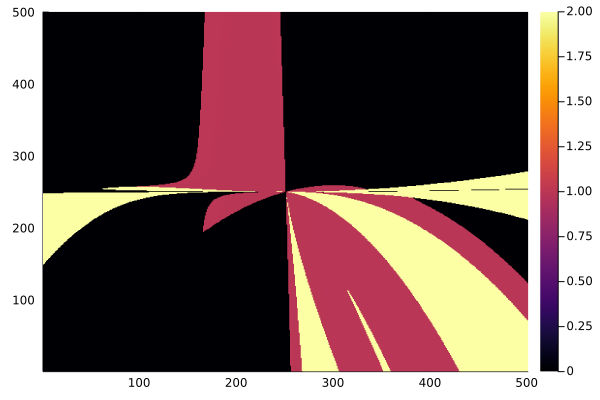

In [113]:
heatmap(Max')

In [114]:
i=100 # chi_1
j=200 # chi_2
par_f = par_ff(i,j,N,M,p2i,p2f,p3i,p3f)
S(im,0,flu,par_f,par_s)
#par_f

5-element Vector{ComplexF64}:
  -1.093495394466305e-15 + 0.3756728385539038im
 -1.4389050508361994e-16 + 0.9391018599969653im
  3.3306690738754696e-16 - 0.05119442346780598im
   4.545632946991408e-16 + 1.0112147335036679im
   7.335469555478448e-16 + 0.6674356231571026im

In [115]:
MinRS = zeros(N,M)

for i in 1:N
    for j in 1:M
        par_f = par_ff(i,j,N,M,p2i,p2f,p3i,p3f)
        E = S(im,1,flu,par_f,par_s)
        R = real.(E)
        I = imag.(E)
        MM = maximum(R)
            if MM <= 0 
            MinRS[i,j] = MM
            end
    end
end

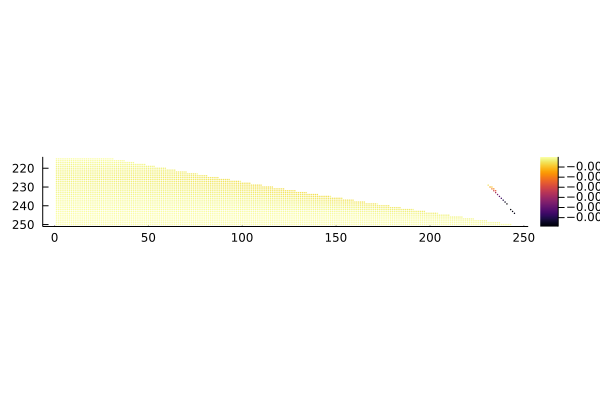

In [116]:
Plots.spy(MinRS)

Vemos que un par de autovalores tiene parte real positiva. 

In [117]:
eigvecs(II(flu,c,par_f,par_s))

5×5 Matrix{Float64}:
 1.0  0.0  -0.212985      0.149743   0.0314213
 0.0  1.0  -0.000512019   0.07212    0.00924621
 0.0  0.0   0.977039     -0.671155  -0.0741923
 0.0  0.0  -0.00481055    0.686043   0.0426626
 0.0  0.0   0.00288929   -0.22643   -0.995792

In [118]:
par_f = [-1,-1,-10]
E = eigvecs(10*im .* P(flu,c,par_f) - 0. * II(flu,c,par_f,par_s));

In [119]:
[E[:,1]; E[:,5]]

10-element Vector{ComplexF64}:
   0.08642902174868332 - 1.2286281411732852e-16im
 -0.007028319473187843 + 1.75786979644642e-17im
    0.2887660627194893 - 3.8043400278940094e-16im
   -0.1288526718392019 + 1.5160480448804097e-16im
    0.9447178292518519 + 0.0im
   0.06494349755579452 - 1.0061396160665481e-16im
 0.0028356695891352413 - 5.702903427273753e-17im
   0.10438005029423195 + 7.7021722333370235e-16im
  -0.06678096505529652 - 2.3245294578089215e-16im
    0.9901613044903637 + 0.0im

In [120]:
[E[:,2]; E[:,4]]

10-element Vector{ComplexF64}:
 -0.007691419779587502 + 3.565374901541384e-17im
  5.524382764867232e-5 + 1.8154685016799635e-17im
  -0.04087698843276717 - 9.434518332093122e-16im
  0.011978890523343924 + 1.2693581252708397e-16im
    0.9990627693035062 + 0.0im
   0.08820581270291276 + 1.3364991414568743e-16im
  0.009897835487581016 + 2.2128748981908397e-17im
    0.8151902994463915 + 0.0im
 -0.026324485684138418 - 1.9074420966003295e-17im
    0.5717460665365766 - 2.0215361375762833e-15im

In [121]:
E[:,3]

5-element Vector{ComplexF64}:
    0.9517010459260241 + 0.0im
    0.1522946751200036 + 7.09771258151741e-17im
   0.06351850922441915 + 1.0530366539824665e-15im
 -0.028006685555453166 + 4.513145067692602e-16im
   0.25739556263368185 - 2.3779991749340017e-14im

In [122]:
Ei = inv(E)

5×5 Matrix{ComplexF64}:
  26.8691+1.84012e-13im  -164.364-1.09912e-12im  …   -0.0173472-9.41802e-16im
  22.7355-5.41932e-14im  -138.167+4.41811e-13im        0.830813-1.73625e-15im
   2.2796-1.59894e-14im  -7.32196+9.51196e-14im     -0.00603979-1.66104e-16im
 -2.44016+2.47841e-14im   14.7841-1.64207e-13im       0.0258905+7.80139e-16im
 -47.7593-8.12754e-14im   289.596+5.2732e-13im         0.174826+2.15094e-15im

In [123]:
Ei[3,:]

5-element Vector{ComplexF64}:
     2.279596924831643 - 1.5989387921797596e-14im
    -7.321962329415904 + 9.51196065699131e-14im
  -0.09990729113191252 - 4.57982389860684e-17im
    1.6602580878919324 - 1.8157956555318212e-14im
 -0.006039789633433558 - 1.6610364667395738e-16im

In [124]:
Ei[5,:]'*E[:,5]

0.9999999999999998 - 1.7653724458295433e-15im

In [125]:
ET = eigvecs(10*im .* P(flu,c,par_f)');

In [126]:
[ET[:,1]; ET[:,5]];

In [127]:
[ET[:,2]; ET[:,3]];

In [128]:
ET[:,4] - ET[1,4]/Ei[4,1] .* Ei[4,:];

In [129]:
1/(Ei[3,1]/Ei[3,3])

-0.043826735351159087 - 3.274968937400403e-16im

In [130]:
1/(Ei[3,1]/Ei[3,5])

-0.0026494989388879 - 9.14492868170645e-17im

 [-1,-1,-1] -> 16/5, 4  $\frac{4\chi_2}{\chi_1}(4/5,1)$
 [-1,-2,10] -> -16, 20
 [-1,-0.5,-1] -> -64, 80

In [131]:
4χ[2]/χ[1]*[4/5;1]

2-element Vector{Float64}:
 1.6
 2.0

In [132]:
function coc(par_f)
    return 4par_f[3]/par_f[2]*[-4/5 ; 1]
end

coc (generic function with 1 method)

In [133]:
coc([-1,-1,-10])

2-element Vector{Float64}:
 -32.0
  40.0

In [134]:
coc([-1,-0.5,-10])

2-element Vector{Float64}:
 -64.0
  80.0

Alternativamente podemos quedarnos con las expresiones en derivadas del los campos del fluido.
Es decir:

$(\zeta^a, \zeta^{ab})$ -> $f^j = (\mu, v, x_i)$ -> $(-1,0,0,0,0)$

$$
\partial_t c^j = \partial_i F^{ij}(f) + I^j(f) = \frac{\partial F^{ij}}{\partial f^k}\partial_i f^k + I^j(j)
$$

In [135]:
flu=[1.;0.0;0;0;0];
#con=ones(5)
par_f = [-1.,1.,-10.]
#par_f = [-1,-0.5,-10]
par_s = [-1/15π, 1/1π, -0.1/1π]
con = F(flu,zeros(5), par_f);
PP = inv(Jac(flu,con,par_f))*(1.0im*JFac(flu,par_f) + 1.0.*JSac(flu,par_f,par_s));

In [136]:
eigvals(PP)

5-element Vector{ComplexF64}:
 -0.01935884507765262 - 0.6366154008404264im
 -0.01935884507764971 + 0.6366154008404309im
 0.034862515028231934 + 0.6638069562731905im
 0.034862515028235154 - 0.6638069562731943im
  0.15657547918056527 + 6.586061503065444e-17im

In [137]:
Et = eigvecs(PP);

In [138]:
Ett = inv(Et);

In [139]:
H = adjoint(Ett)*Ett
#latexify(H)

5×5 Matrix{ComplexF64}:
      4.16461+0.0im         …       11.3925-4.4635e-13im
 -5.93621e-13-0.082671im       -1.90262e-12+2.891im
      17.0387-2.6652e-13im           50.507-2.89805e-12im
  8.19459e-12-5.34917im         2.54976e-11-60.4677im
      11.3925+4.4635e-13im          40.2243+0.0im

In [140]:
H*PP - adjoint(PP)*H

5×5 Matrix{ComplexF64}:
         0.0+7.14066e-13im  …       3.84239+2.27305e-12im
 1.53639e-14-5.92941im         -6.11422e-13-16.2599im
     2.21248+3.28103e-12im          24.5808+1.01657e-11im
 9.18606e-13+70.7497im          1.19548e-11+218.722im
    -3.84239+2.27305e-12im              0.0+7.73597e-12im

In [141]:
eigvals(H)

5-element Vector{Float64}:
   0.3467516009957278
   0.6326849729026027
   1.9024909222017832
 115.1163639826437
 824.9488438101142

In [142]:
eigvals(H*(1.0im.* JFac(flu,par_f) - 1.0.*JSac(flu,con,par_s)))

5-element Vector{ComplexF64}:
   -3.8717673079144923 + 3.67945198813737e-11im
 4.760121203234243e-12 - 6.604890203431376e-12im
    3.5782393910002384 - 3.004367552733458e-11im
     6673.106538959353 - 102645.4168315892im
     6673.106538961969 + 102645.41683162886im

In [143]:
H*JSac(flu,con,p)

5×5 Matrix{Complex{Num}}:
 0.0+(0.0)*im  0.0+(0.0)*im  0.0+(0.0)*im  0.0+(0.0)*im  0.0+(0.0)*im
 0.0+(0.0)*im  0.0+(0.0)*im  0.0+(0.0)*im  0.0+(0.0)*im  0.0+(0.0)*im
 0.0+(0.0)*im  0.0+(0.0)*im  0.0+(0.0)*im  0.0+(0.0)*im  0.0+(0.0)*im
 0.0+(0.0)*im  0.0+(0.0)*im  0.0+(0.0)*im  0.0+(0.0)*im  0.0+(0.0)*im
 0.0+(0.0)*im  0.0+(0.0)*im  0.0+(0.0)*im  0.0+(0.0)*im  0.0+(0.0)*im

In [144]:
1/1.333333

0.7500001875000468

In [145]:
200/27

7.407407407407407